## Zadania do wykonania

### 1. Napisz program pobierające dane z Internetu.

Zadanie polega na znalezieniu legalnego źródła mediów w Internecie np. zdjęć. Program powinien posiadać pasek postępu oraz łatwy do zrozumienia system logowania błędów.

Write width: d
Incorrect value. Please write value in range (0 100]
Write width: 465
Write height: 
Incorrect value. Please write value in range (0 100]
Write width: 5


100%|██████████| 100/100 [00:04<00:00, 24.38it/s]


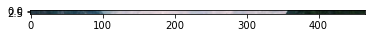

In [10]:
# Progres bar, asynchr|synchr
from tqdm import tqdm
from time import sleep
from tqdm import trange
from asyncio import create_task, run, gather

# Żądanie dla url
from PIL import Image
import requests
from io import BytesIO

# Matlab obrazek
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import random

# https://picsum.photos/images
##########################################################################

# cancel

async def bar(sleepTime):
    for i in trange(100):
        sleep(sleepTime)
        
def randomId():
    return random.randint(1, 1084)
def width():
    w = input('Write width: ')
    while not (w.isnumeric() and int(w) <= 1000 and int(w) > 0):
        print(f'Incorrect value. Please write value in range (0 100]')
        w = input('Write width: ')
    return w
def height():
    h = input('Write height: ')
    while not (h.isnumeric() and int(h) <= 1000 and int(h) > 0):
        print(f'Incorrect value. Please write value in range (0 100]')
        h = input('Write width: ')
    return h
def barLevel(wid,hei,sleepTime = 0.02):
    if wid>800 or hei>800:
        sleepTime = 0.08
    elif wid>600 or hei>600:
        sleepTime = 0.06
    elif wid>400 or hei>400:
        sleepTime = 0.04
    return sleepTime
    
async def img(idR,widU,heiU):
    url = 'https://picsum.photos/id/'
    urlAll = url + str(idR) + '/' + str(widU) + '/' + str(heiU) + '.jpg'
    response = requests.get(urlAll)
    img = Image.open(BytesIO(response.content))
    imgplot = plt.imshow(img)
    plt.show()
    del response

async def main():
    id = randomId()
    wid = width()
    hei = height()
    bLvl = barLevel(int(wid),int(hei))
    results = await gather(bar(bLvl), img(id,wid,hei))

await main()

In [23]:
# Instalacja progress bar

import sys
!{sys.executable} -m pip install tqdm
import sys
!{sys.executable} -m pip install ipywidgets